## Bank Telemarketing Campaign Case Study.

In this case study you’ll be learning Exploratory Data Analytics with the help of a case study on "Bank marketing campaign". This will enable you to understand why EDA is a most important step in the process of Machine Learning.

#### Problem Statement:

 

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate. 

#### Importing the libraries.

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Session- 2, Data Cleaning 

### Segment- 2, Data Types 

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame. 

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type** 
- **Coordinates type of data**: latitude and longitude type.


#### Read in the Data set. 

In [3]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0=pd.read_csv("bank_marketing_updated_v1.csv")

In [4]:
#Print the head of the data frame.
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Segment- 3, Fixing the Rows and Columns 

Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately. 
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.


#### Read the file without unnecessary headers.

In [5]:
#read the file in inp0 without first two rows as it is of no use.
inp0=pd.read_csv("bank_marketing_updated_v1.csv",skiprows=2)

In [6]:
#print the head of the data frame.
inp0.head()


,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [7]:
#print the information of variables to check their data types.
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [8]:
# change the dtype of age from float to int


In [9]:
#print the average age of customers.


#### Dropping customer id column. 

In [10]:
#drop the customer id as it is of no use.
inp0.drop("customerid",axis=1,inplace=True)

In [11]:
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dividing "jobedu" column into job and education categories. 

In [12]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0['job']=inp0["jobedu"].apply(lambda x:x.split(",")[0])

In [13]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0['education']=inp0["jobedu"].apply(lambda x:x.split(",")[1]) 

In [14]:
#drop the "jobedu" column from the dataframe.
inp0.drop("jobedu",axis=1,inplace=True)


In [15]:
inp0.head()


,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


### Segment- 4, Impute/Remove missing values 

Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).


#### handling missing values in age column.

In [16]:
inp0.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [17]:
#count the missing values in age column.
inp0["age"].isnull().sum()

20

In [18]:
#pring the shape of dataframe inp0
inp0.shape

(45211, 19)

In [19]:
#calculate the percentage of missing values in age column.
(20/45211)*100

0.0442370219636814

Drop the records with age missing. 

In [20]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.
inp1=inp0[~inp0["age"].isnull()].copy()

In [21]:
inp1.shape

(45191, 19)

In [22]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45191 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45191 non-null  float64
 1   salary     45191 non-null  int64  
 2   balance    45191 non-null  int64  
 3   marital    45191 non-null  object 
 4   targeted   45191 non-null  object 
 5   default    45191 non-null  object 
 6   housing    45191 non-null  object 
 7   loan       45191 non-null  object 
 8   contact    45191 non-null  object 
 9   day        45191 non-null  int64  
 10  month      45141 non-null  object 
 11  duration   45191 non-null  object 
 12  campaign   45191 non-null  int64  
 13  pdays      45191 non-null  int64  
 14  previous   45191 non-null  int64  
 15  poutcome   45191 non-null  object 
 16  response   45161 non-null  object 
 17  job        45191 non-null  object 
 18  education  45191 non-null  object 
dtypes: float64(1), int64(6), object(12)
memory usa

In [23]:
inp1.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

#### handling missing values in month column

In [24]:
#count the missing values in month column in inp1.
inp1["month"].isnull().sum()

50

In [25]:
#print the percentage of each month in the data frame inp1.
(50/45211)*100

0.11059255490920351

In [26]:
#find the mode of month in inp1
mode_month=inp1["month"].mode()[0]

In [27]:
# fill the missing values with mode value of month in inp1.
inp1["month"].fillna(mode_month,inplace=True)

In [28]:
inp1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [29]:
#let's see the null values in the month column.
inp1["month"].isnull().sum()

0

In [30]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45191 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45191 non-null  float64
 1   salary     45191 non-null  int64  
 2   balance    45191 non-null  int64  
 3   marital    45191 non-null  object 
 4   targeted   45191 non-null  object 
 5   default    45191 non-null  object 
 6   housing    45191 non-null  object 
 7   loan       45191 non-null  object 
 8   contact    45191 non-null  object 
 9   day        45191 non-null  int64  
 10  month      45191 non-null  object 
 11  duration   45191 non-null  object 
 12  campaign   45191 non-null  int64  
 13  pdays      45191 non-null  int64  
 14  previous   45191 non-null  int64  
 15  poutcome   45191 non-null  object 
 16  response   45161 non-null  object 
 17  job        45191 non-null  object 
 18  education  45191 non-null  object 
dtypes: float64(1), int64(6), object(12)
memory usa

#### handling missing values in response column 

In [31]:
#count the missing values in response column in inp1.
inp1["response"].isnull().sum()

30

In [32]:
#calculate the percentage of missing values in response column. 
(30/45211)*100

0.0663555329455221

Target variable is better of not imputed.
- Drop the records with missing values.

In [33]:
#drop the records with response missings in inp1.
inp1=inp1[~inp1["response"].isnull()]

In [34]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45161 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45161 non-null  float64
 1   salary     45161 non-null  int64  
 2   balance    45161 non-null  int64  
 3   marital    45161 non-null  object 
 4   targeted   45161 non-null  object 
 5   default    45161 non-null  object 
 6   housing    45161 non-null  object 
 7   loan       45161 non-null  object 
 8   contact    45161 non-null  object 
 9   day        45161 non-null  int64  
 10  month      45161 non-null  object 
 11  duration   45161 non-null  object 
 12  campaign   45161 non-null  int64  
 13  pdays      45161 non-null  int64  
 14  previous   45161 non-null  int64  
 15  poutcome   45161 non-null  object 
 16  response   45161 non-null  object 
 17  job        45161 non-null  object 
 18  education  45161 non-null  object 
dtypes: float64(1), int64(6), object(12)
memory usa

In [35]:
#calculate the missing values in each column of data frame: inp1.
inp1.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

In [36]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45161 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45161 non-null  float64
 1   salary     45161 non-null  int64  
 2   balance    45161 non-null  int64  
 3   marital    45161 non-null  object 
 4   targeted   45161 non-null  object 
 5   default    45161 non-null  object 
 6   housing    45161 non-null  object 
 7   loan       45161 non-null  object 
 8   contact    45161 non-null  object 
 9   day        45161 non-null  int64  
 10  month      45161 non-null  object 
 11  duration   45161 non-null  object 
 12  campaign   45161 non-null  int64  
 13  pdays      45161 non-null  int64  
 14  previous   45161 non-null  int64  
 15  poutcome   45161 non-null  object 
 16  response   45161 non-null  object 
 17  job        45161 non-null  object 
 18  education  45161 non-null  object 
dtypes: float64(1), int64(6), object(12)
memory usa

#### handling pdays column. 

In [37]:
#describe the pdays column of inp1.
inp1["pdays"].describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Objective is:
- you should ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [38]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45161 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45161 non-null  float64
 1   salary     45161 non-null  int64  
 2   balance    45161 non-null  int64  
 3   marital    45161 non-null  object 
 4   targeted   45161 non-null  object 
 5   default    45161 non-null  object 
 6   housing    45161 non-null  object 
 7   loan       45161 non-null  object 
 8   contact    45161 non-null  object 
 9   day        45161 non-null  int64  
 10  month      45161 non-null  object 
 11  duration   45161 non-null  object 
 12  campaign   45161 non-null  int64  
 13  pdays      45161 non-null  int64  
 14  previous   45161 non-null  int64  
 15  poutcome   45161 non-null  object 
 16  response   45161 non-null  object 
 17  job        45161 non-null  object 
 18  education  45161 non-null  object 
dtypes: float64(1), int64(6), object(12)
memory usa

In [39]:
inp1.loc[inp1.pdays<0,"pdays"]=np.NaN

In [40]:
inp1.shape

(45161, 19)

In [41]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45161 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45161 non-null  float64
 1   salary     45161 non-null  int64  
 2   balance    45161 non-null  int64  
 3   marital    45161 non-null  object 
 4   targeted   45161 non-null  object 
 5   default    45161 non-null  object 
 6   housing    45161 non-null  object 
 7   loan       45161 non-null  object 
 8   contact    45161 non-null  object 
 9   day        45161 non-null  int64  
 10  month      45161 non-null  object 
 11  duration   45161 non-null  object 
 12  campaign   45161 non-null  int64  
 13  pdays      8246 non-null   float64
 14  previous   45161 non-null  int64  
 15  poutcome   45161 non-null  object 
 16  response   45161 non-null  object 
 17  job        45161 non-null  object 
 18  education  45161 non-null  object 
dtypes: float64(2), int64(5), object(12)
memory usa

In [42]:
inp1["pdays"].unique()

array([ nan, 151., 166.,  91.,  86., 143., 147.,  89., 140., 176., 101.,
       174., 170., 167., 195., 165., 129., 188., 196., 172., 118., 119.,
       104., 171., 117., 164., 132., 131., 123., 159., 186., 111., 116.,
       173., 178., 110., 115., 152.,  96., 103., 150., 175., 193., 181.,
       185., 154., 145., 138., 126., 180., 109., 158., 168.,  97., 182.,
       127., 130., 194., 125., 105., 102.,  26., 179.,  28., 183., 155.,
       112., 120., 137., 124., 187., 190., 113., 162., 134., 169., 189.,
         8., 144., 191., 184., 177.,   5.,  99., 133.,  93.,  92.,  10.,
       100., 156., 198., 106., 153., 146., 128.,   7., 121., 160., 107.,
        90.,  27., 197., 136., 139., 122., 157., 149., 135.,  30., 114.,
        98., 192., 163.,  34.,  95., 141.,  31., 199.,  94., 108.,  29.,
       268., 247., 253., 226., 244., 239., 245., 204., 231., 238., 258.,
       230., 254., 265.,  71., 223., 246., 250., 266., 240., 205., 261.,
       259., 241., 260., 234., 251., 225., 161., 23

In [43]:
inp1["pdays"].describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Segment- 5, Handling Outliers 

Major approaches to the treat outliers:
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable 

In [44]:
inp1["age"]

0        58.0
1        44.0
2        33.0
3        47.0
4        33.0
         ... 
45206    51.0
45207    71.0
45208    72.0
45209    57.0
45210    37.0
Name: age, Length: 45161, dtype: float64

In [45]:
#describe the age variable in inp1.
inp1["age"].describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

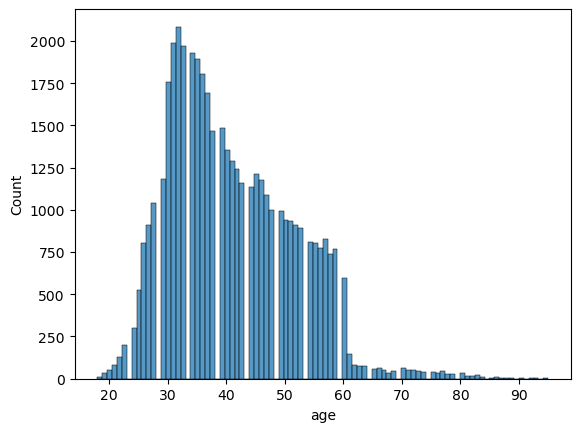

In [46]:
#plot the histogram of age variable.
sns.histplot(inp1["age"])
plt.show()

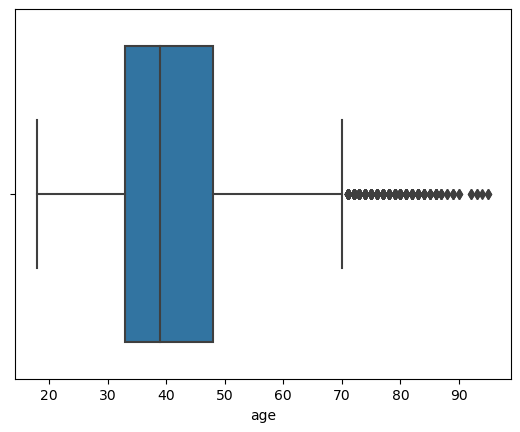

In [47]:
#plot the boxplot of age variable.
sns.boxplot(inp1["age"])
plt.show()

In [48]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45161 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45161 non-null  float64
 1   salary     45161 non-null  int64  
 2   balance    45161 non-null  int64  
 3   marital    45161 non-null  object 
 4   targeted   45161 non-null  object 
 5   default    45161 non-null  object 
 6   housing    45161 non-null  object 
 7   loan       45161 non-null  object 
 8   contact    45161 non-null  object 
 9   day        45161 non-null  int64  
 10  month      45161 non-null  object 
 11  duration   45161 non-null  object 
 12  campaign   45161 non-null  int64  
 13  pdays      8246 non-null   float64
 14  previous   45161 non-null  int64  
 15  poutcome   45161 non-null  object 
 16  response   45161 non-null  object 
 17  job        45161 non-null  object 
 18  education  45161 non-null  object 
dtypes: float64(2), int64(5), object(12)
memory usa

#### Salary variable 

In [49]:
#describe the salary variable of inp1.
inp1["salary"].describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

<AxesSubplot:xlabel='salary'>

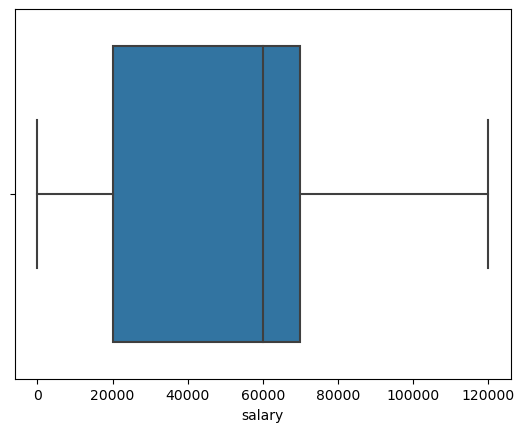

In [50]:
#plot the boxplot of salary variable.
sns.boxplot(inp1["salary"])

#### Balance variable 

In [51]:
#describe the balance variable of inp1.
inp1["balance"].describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

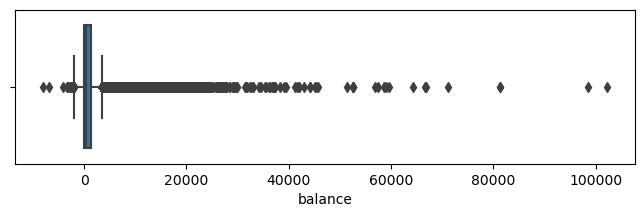

In [52]:
#plot the boxplot of balance variable.
plt.figure(figsize=(8,2))
sns.boxplot(inp1["balance"])
plt.show()

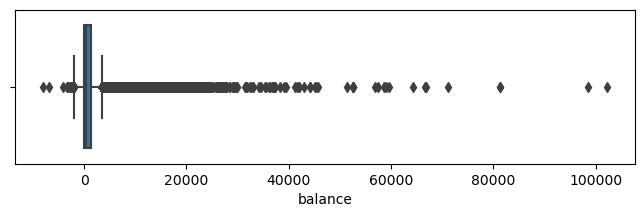

In [53]:
#plot the boxplot of balance variable after scaling in 8:2.
plt.figure(figsize=(8,2))
sns.boxplot(inp1["balance"])
plt.show()

In [54]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
inp1["balance"].quantile((0.5, 0.7, 0.9, 0.95,0.99))

0.50      448.0
0.70     1126.0
0.90     3576.0
0.95     5769.0
0.99    13173.4
Name: balance, dtype: float64

In [55]:
inp1[inp1.balance>15000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


<AxesSubplot:>

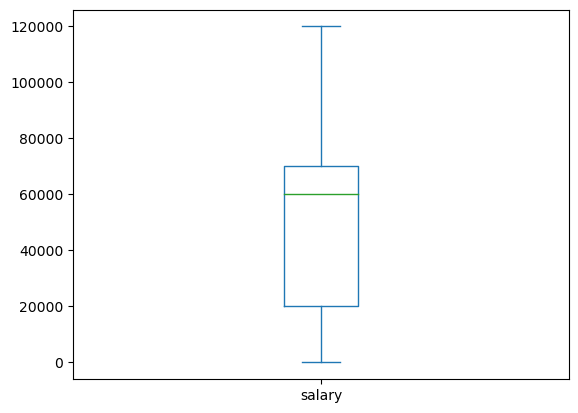

In [56]:
inp1.salary.plot.box()

### Segment- 6, Standardising values 

#### Duration variable

In [57]:
#describe the duration variable of inp1
inp1["duration"].describe()

count       45161
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [58]:
inp1["duration"].unique()

array(['261 sec', '151 sec', '76 sec', ..., '20.7666666666667 min',
       '25.9333333333333 min', '16.2833333333333 min'], dtype=object)

In [59]:
inp1["duration"].head(20)

0     261 sec
1     151 sec
2      76 sec
3      92 sec
4     198 sec
5     139 sec
6     217 sec
7     380 sec
8      50 sec
9      55 sec
10    222 sec
11    137 sec
12    517 sec
13     71 sec
14    174 sec
15    353 sec
16     98 sec
17     38 sec
18    219 sec
19     54 sec
Name: duration, dtype: object

In [60]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
inp1["duration"]=inp1["duration"].apply(lambda x:float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))

## Session- 3, Univariate Analysis 

### Segment- 2, Categorical unordered univariate analysis 

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


#### Marital status 

In [61]:
inp1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",4.350000,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",2.516667,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",1.266667,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",1.533333,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",3.300000,1,NaN,0,unknown,no,unknown,unknown


In [62]:
inp1.dtypes

age          float64
salary         int64
balance        int64
marital       object
targeted      object
default       object
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign       int64
pdays        float64
previous       int64
poutcome      object
response      object
job           object
education     object
dtype: object

In [63]:
#calculate the percentage of each marital status category. 
inp1['marital'].value_counts(normalize=True)

married     0.601957
single      0.282943
divorced    0.115099
Name: marital, dtype: float64

In [64]:
inp1['marital'].value_counts()

married     27185
single      12778
divorced     5198
Name: marital, dtype: int64

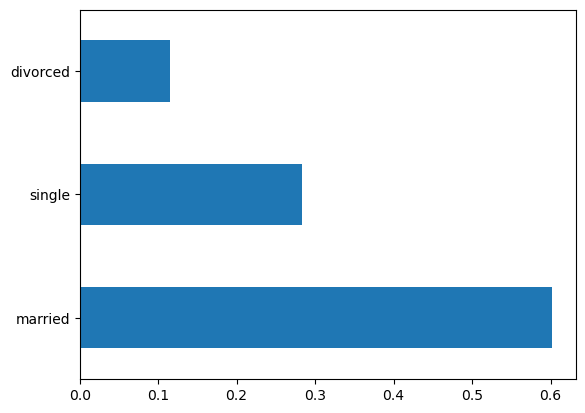

In [65]:
#plot the bar graph of percentage marital status categories
inp1["marital"].value_counts(normalize=True).plot.barh()
plt.show()

#### Job  

In [66]:
#calculate the percentage of each job status category.
inp1['job'].value_counts(normalize=True)

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64

<AxesSubplot:>

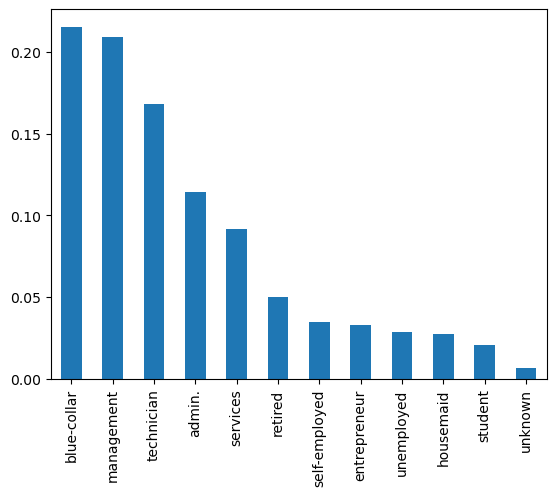

In [67]:
#plot the bar graph of percentage job categories
inp1['job'].value_counts(normalize=True).plot.bar()


### Segment- 3, Categorical ordered univariate analysis 

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

#### Education

In [68]:
#calculate the percentage of each education category.
inp1["education"].value_counts()

secondary    23180
tertiary     13286
primary       6839
unknown       1856
Name: education, dtype: int64

In [69]:
inp1["education"].value_counts(normalize=True)

secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: education, dtype: float64

<AxesSubplot:>

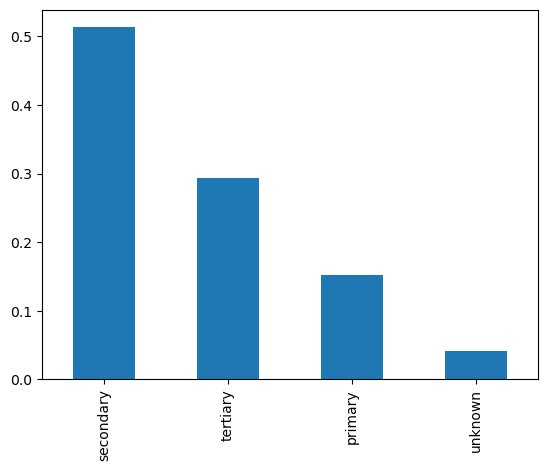

In [70]:
#plot the pie and bar chart of education categories
inp1["education"].value_counts(normalize=True).plot.bar()

<AxesSubplot:ylabel='education'>

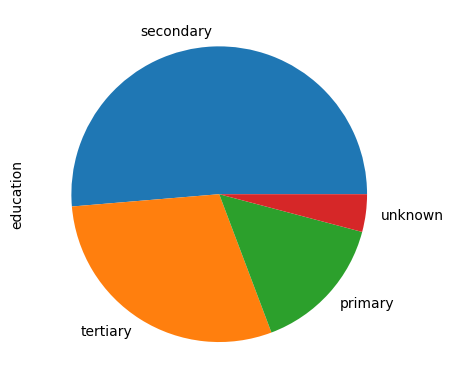

In [71]:
inp1["education"].value_counts().plot.pie()

#### poutcome 

In [72]:
#calculate the percentage of each poutcome category.
inp1["poutcome"].value_counts(normalize=True)

unknown    0.817520
failure    0.108368
other      0.040721
success    0.033392
Name: poutcome, dtype: float64

<AxesSubplot:>

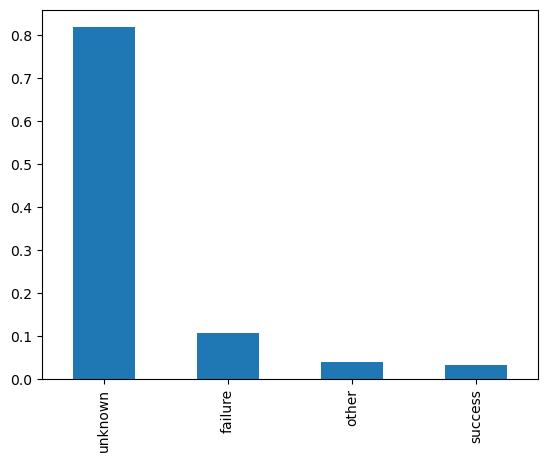

In [73]:
inp1["poutcome"].value_counts(normalize=True).plot.bar()

<AxesSubplot:>

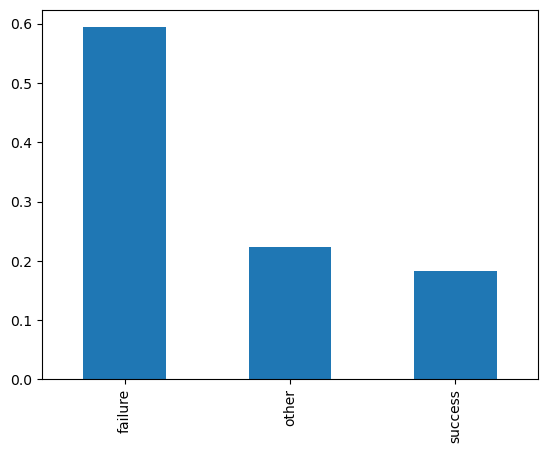

In [74]:
inp1[~(inp1.poutcome=="unknown")]["poutcome"].value_counts(normalize=True).plot.bar()

#### Response the target variable 

In [75]:
#calculate the percentage of each response category.
inp1["response"].value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

<AxesSubplot:ylabel='response'>

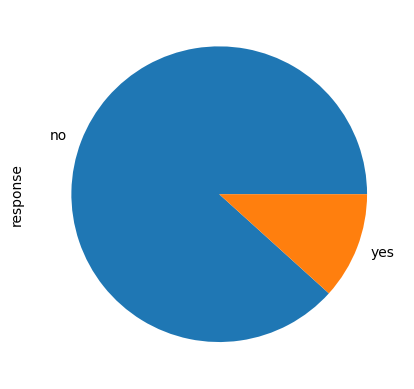

In [76]:
#plot the pie chart of response categories
inp1["response"].value_counts(normalize=True).plot.pie()

## Session- 4, Bivariate and Multivariate Analysis

### Segment-2, Numeric- numeric analysis 

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

In [77]:
inp1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",4.350000,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",2.516667,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",1.266667,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",1.533333,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",3.300000,1,NaN,0,unknown,no,unknown,unknown


In [78]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45161 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45161 non-null  float64
 1   salary     45161 non-null  int64  
 2   balance    45161 non-null  int64  
 3   marital    45161 non-null  object 
 4   targeted   45161 non-null  object 
 5   default    45161 non-null  object 
 6   housing    45161 non-null  object 
 7   loan       45161 non-null  object 
 8   contact    45161 non-null  object 
 9   day        45161 non-null  int64  
 10  month      45161 non-null  object 
 11  duration   45161 non-null  float64
 12  campaign   45161 non-null  int64  
 13  pdays      8246 non-null   float64
 14  previous   45161 non-null  int64  
 15  poutcome   45161 non-null  object 
 16  response   45161 non-null  object 
 17  job        45161 non-null  object 
 18  education  45161 non-null  object 
dtypes: float64(3), int64(5), object(11)
memory usa

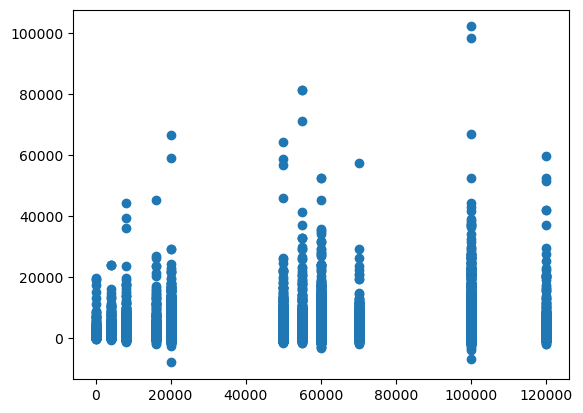

In [79]:
#plot the scatter plot of balance and salary variable in inp1
plt.scatter(x=inp1["salary"],y=inp1["balance"])
plt.show()

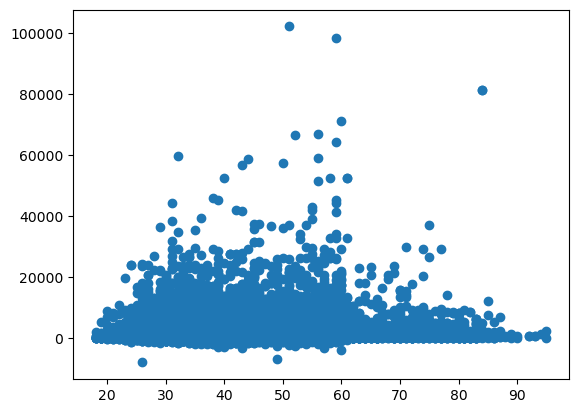

In [80]:
#plot the scatter plot of balance and age variable in inp1
plt.scatter(y=inp1["balance"],x=inp1["age"])
plt.show()

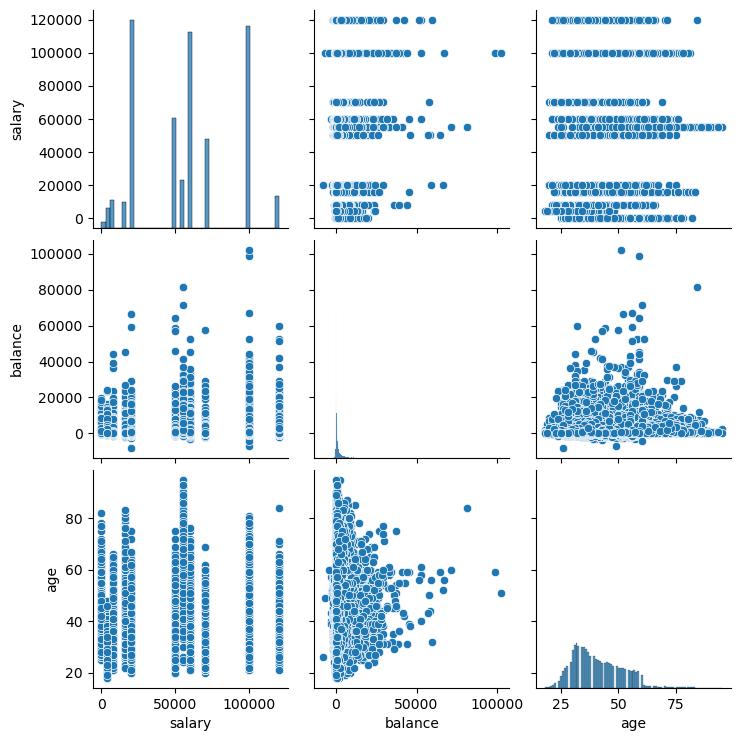

In [81]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data=inp1,vars=["salary","balance","age"])
plt.show()

#### Correlation heat map 

In [82]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
inp1[["age","salary","balance"]].corr()

,age,salary,balance
age,1.000000,0.024513,0.097710
salary,0.024513,1.000000,0.055489
balance,0.097710,0.055489,1.000000


<AxesSubplot:>

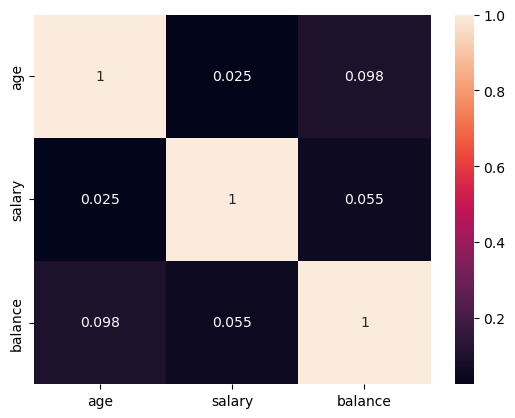

In [83]:
sns.heatmap(inp1[["age","salary","balance"]].corr(),annot=True)

### Segment- 4, Numerical categorical variable

#### Salary vs response 

In [84]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
inp1.groupby("response")["salary"].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [85]:
#groupby the response to find the median of the salary with response no & yes seperatly.
inp1.groupby("response")["salary"].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

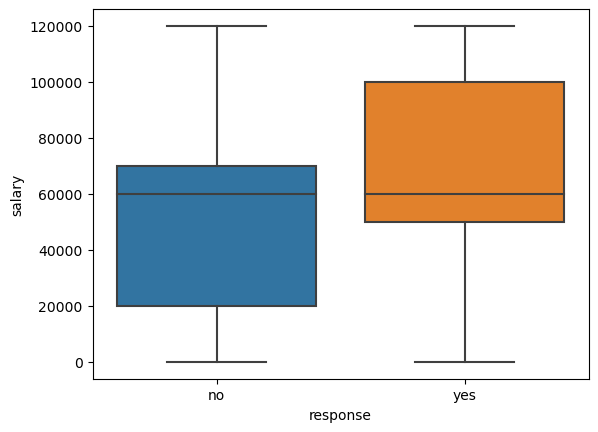

In [86]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data=inp1,x="response",y="salary")
plt.show()

#### Balance vs response 

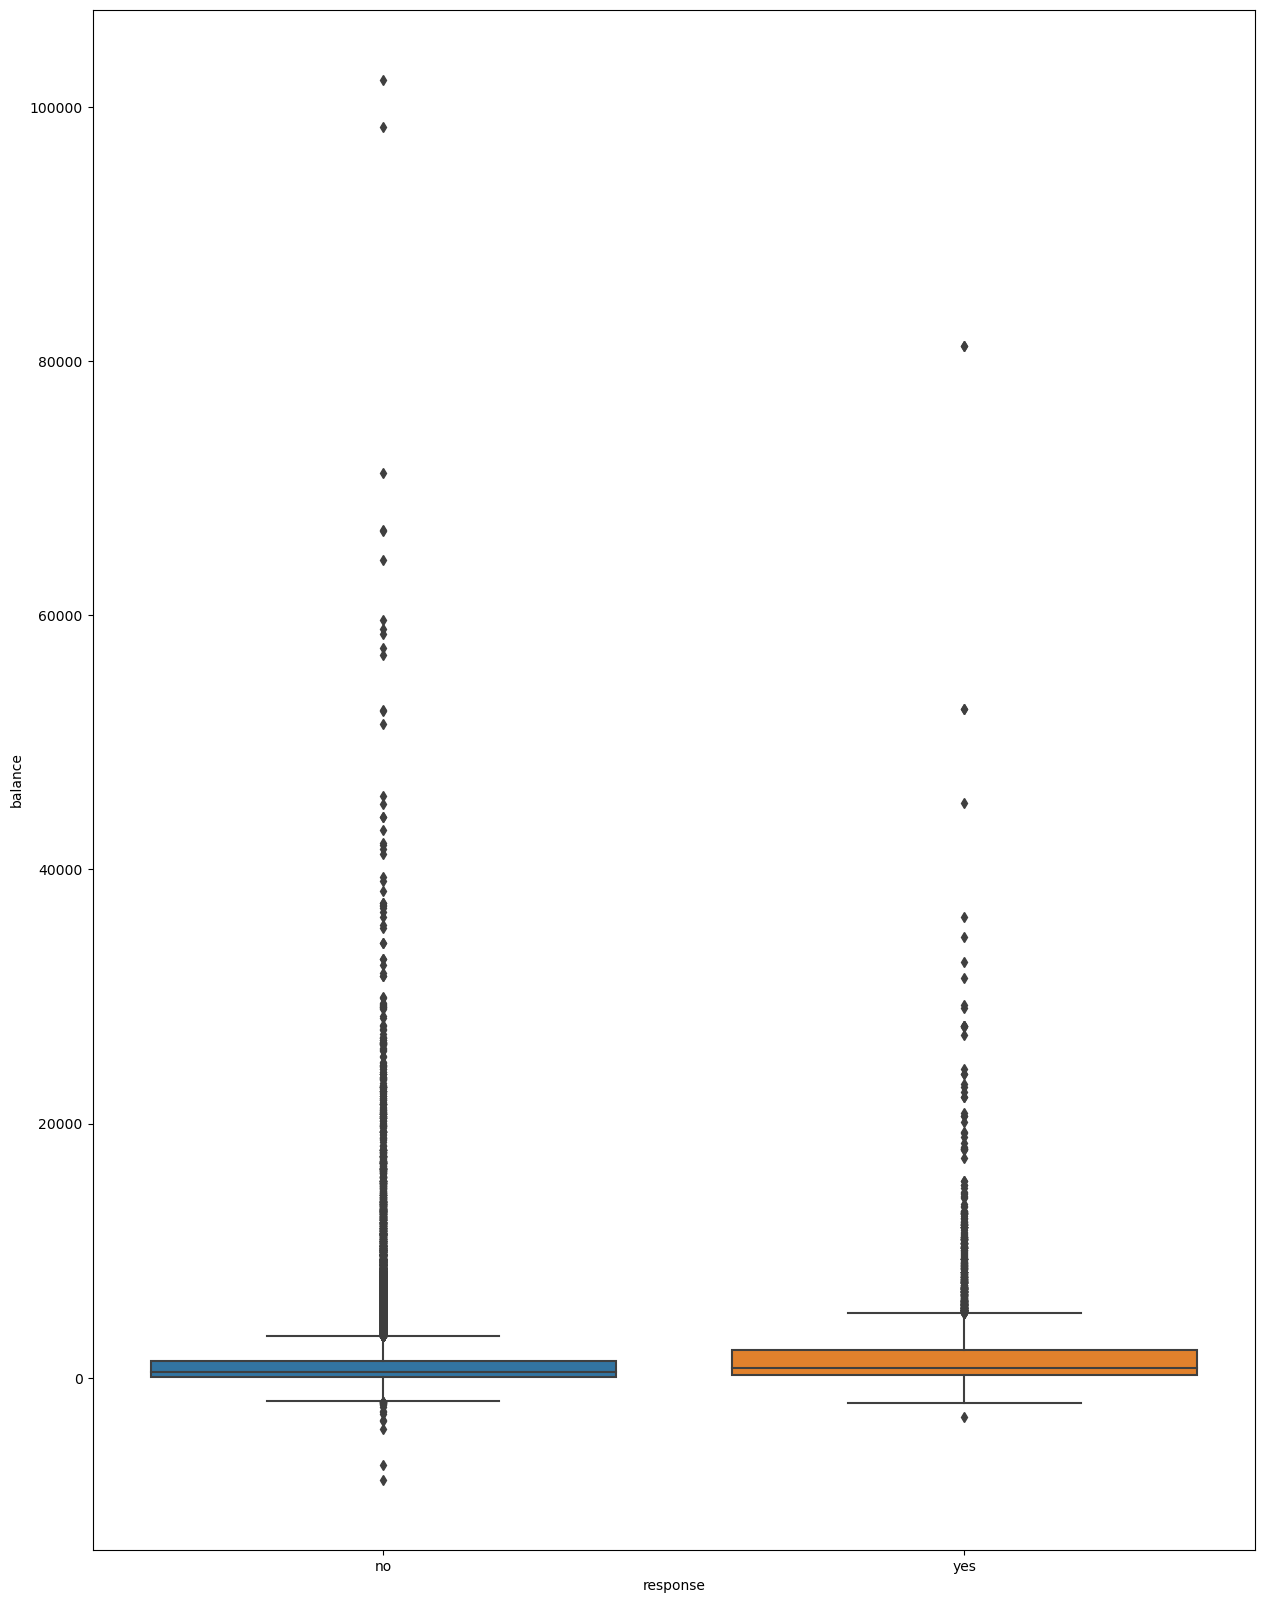

In [87]:
#plot the box plot of balance for yes & no responses.
plt.figure(figsize=(15,20))
sns.boxplot(data=inp1,x="response",y="balance")
plt.show()

In [88]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
inp1.groupby("response")["balance"].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [89]:
#groupby the response to find the median of the balance with response no & yes seperatly.
inp1.groupby("response")["balance"].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

##### 75th percentile 

In [90]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [91]:
#calculate the mean, median and 75th percentile of balance with response
inp1.groupby("response")["balance"].aggregate(["mean","median",p75])

,mean,median,p75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


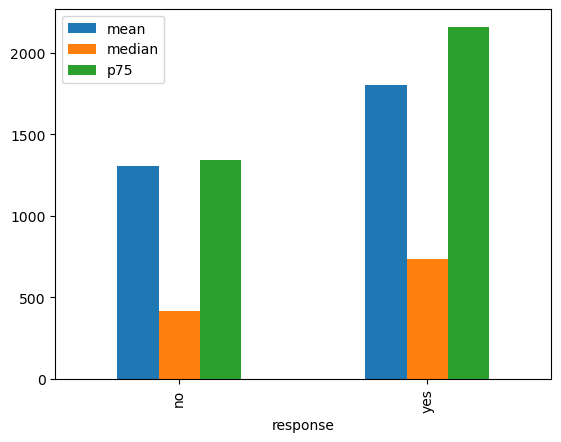

In [92]:
#plot the bar graph of balance's mean an median with response.
inp1.groupby("response")["balance"].aggregate(["mean","median",p75]).plot.bar()
plt.show()

#### Education vs salary 

In [93]:
#groupby the education to find the mean of the salary education category.
inp1.groupby("education")["salary"].mean()

education
primary      34232.343910
secondary    49731.449525
tertiary     82880.249887
unknown      46529.633621
Name: salary, dtype: float64

In [94]:
#groupby the education to find the median of the salary for each education category.
inp1.groupby("education")["salary"].median()

education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

#### Job vs salary

In [95]:
#groupby the job to find the mean of the salary for each job category.
inp1.groupby("job")["salary"].mean()

job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

### Segment- 5, Categorical categorical variable 

In [96]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
inp1["response_flag"]=np.where(inp1["response"]=="yes",1,0)

In [97]:
inp1["response_flag"].value_counts()

0    39876
1     5285
Name: response_flag, dtype: int64

In [98]:
inp1["response_flag"].mean()

0.1170257523084077

#### Education vs response rate

In [99]:
#calculate the mean of response_flag with different education categories.
inp1.groupby("education")["response_flag"].mean()

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

#### Marital vs response rate 

In [100]:
#calculate the mean of response_flag with different marital status categories.
inp1.groupby("marital")["response_flag"].mean()

marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

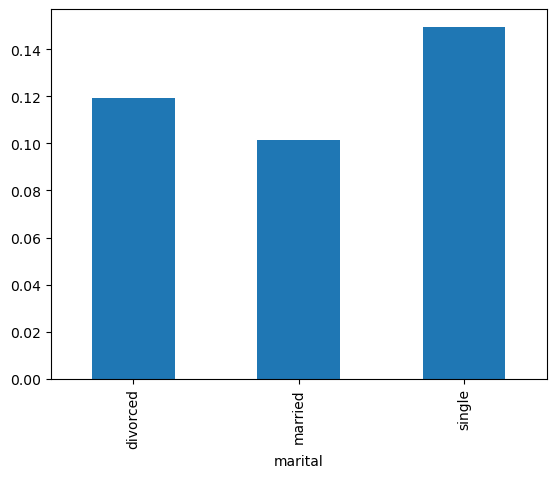

In [101]:
#plot the bar graph of marital status with average value of response_flag
inp1.groupby("marital")["response_flag"].mean().plot.bar()
plt.show()

In [102]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45161 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            45161 non-null  float64
 1   salary         45161 non-null  int64  
 2   balance        45161 non-null  int64  
 3   marital        45161 non-null  object 
 4   targeted       45161 non-null  object 
 5   default        45161 non-null  object 
 6   housing        45161 non-null  object 
 7   loan           45161 non-null  object 
 8   contact        45161 non-null  object 
 9   day            45161 non-null  int64  
 10  month          45161 non-null  object 
 11  duration       45161 non-null  float64
 12  campaign       45161 non-null  int64  
 13  pdays          8246 non-null   float64
 14  previous       45161 non-null  int64  
 15  poutcome       45161 non-null  object 
 16  response       45161 non-null  object 
 17  job            45161 non-null  object 
 18  educat

#### Loans vs response rate 

<AxesSubplot:xlabel='loan'>

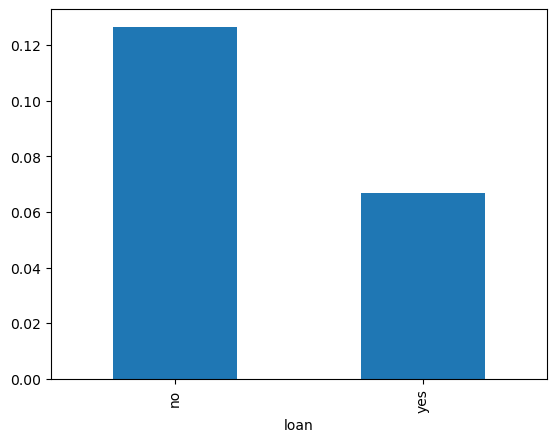

In [103]:
#plot the bar graph of personal loan status with average value of response_flag
inp1.groupby(["loan"])["response_flag"].mean().plot.bar()

#### Housing loans vs response rate 

<AxesSubplot:xlabel='housing'>

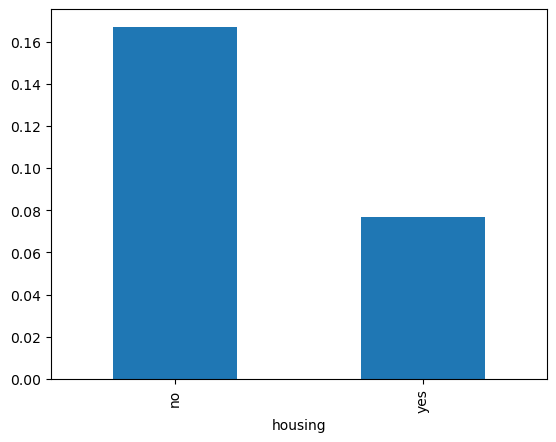

In [104]:
#plot the bar graph of housing loan status with average value of response_flag
inp1.groupby(["housing"])["response_flag"].mean().plot.bar()

#### Age vs response 

<AxesSubplot:xlabel='response_flag', ylabel='age'>

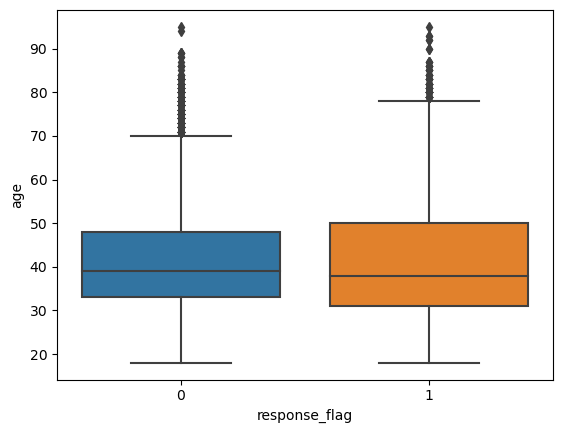

In [105]:
#plot the boxplot of age with response_flag
sns.boxplot(data=inp1,x="response_flag",y="age")

# making buckets from age columns 

In [106]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
inp1["age_groups"]=pd.cut(inp1["age"],[0,30,40,50,60,99],labels=["below 30","30-40","40-50","50-60","above 60"])

In [107]:
inp1.age.head()

0    58.0
1    44.0
2    33.0
3    47.0
4    33.0
Name: age, dtype: float64

In [108]:
inp1.age_groups.head()

0    50-60
1    40-50
2    30-40
3    40-50
4    30-40
Name: age_groups, dtype: category
Categories (5, object): ['below 30' < '30-40' < '40-50' < '50-60' < 'above 60']

In [109]:
inp1["age_groups"].value_counts(normalize=True)

30-40       0.391090
40-50       0.248688
50-60       0.178406
below 30    0.155555
above 60    0.026262
Name: age_groups, dtype: float64

In [110]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45161 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            45161 non-null  float64 
 1   salary         45161 non-null  int64   
 2   balance        45161 non-null  int64   
 3   marital        45161 non-null  object  
 4   targeted       45161 non-null  object  
 5   default        45161 non-null  object  
 6   housing        45161 non-null  object  
 7   loan           45161 non-null  object  
 8   contact        45161 non-null  object  
 9   day            45161 non-null  int64   
 10  month          45161 non-null  object  
 11  duration       45161 non-null  float64 
 12  campaign       45161 non-null  int64   
 13  pdays          8246 non-null   float64 
 14  previous       45161 non-null  int64   
 15  poutcome       45161 non-null  object  
 16  response       45161 non-null  object  
 17  job            45161 non-null  

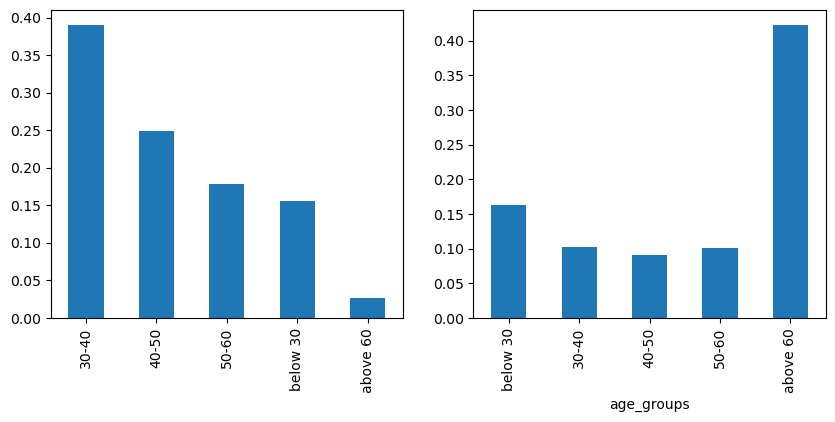

In [111]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp1["age_groups"].value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
inp1.groupby(["age_groups"])["response_flag"].mean().plot.bar()
plt.show()



<AxesSubplot:xlabel='job'>

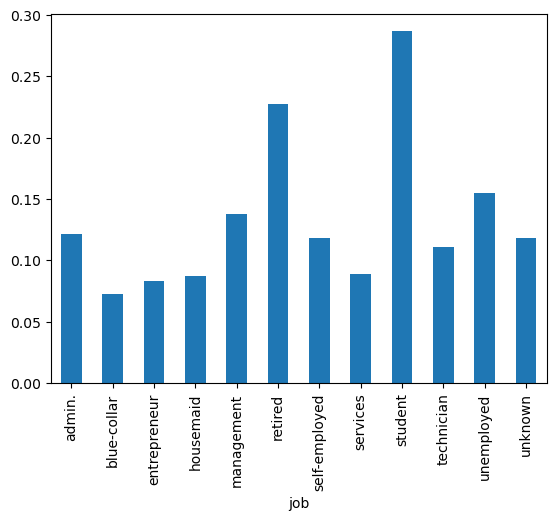

In [112]:
#plot the bar graph of job categories with response_flag mean value.
inp1.groupby(["job"])["response_flag"].mean().plot.bar()

### Segment-6, Multivariate analysis 

#### Education vs marital vs response 

In [113]:
#create heat map of education vs marital vs response_flag
res=pd.pivot_table(data=inp1,index='education',columns="marital",values="response_flag",aggfunc=np.mean)

<AxesSubplot:xlabel='marital', ylabel='education'>

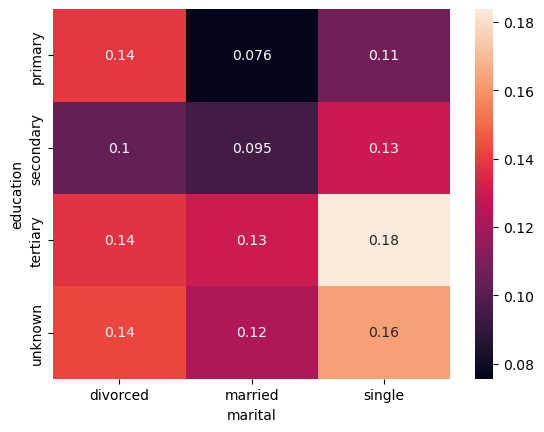

In [114]:
sns.heatmap(res,annot=True)

<AxesSubplot:xlabel='marital', ylabel='education'>

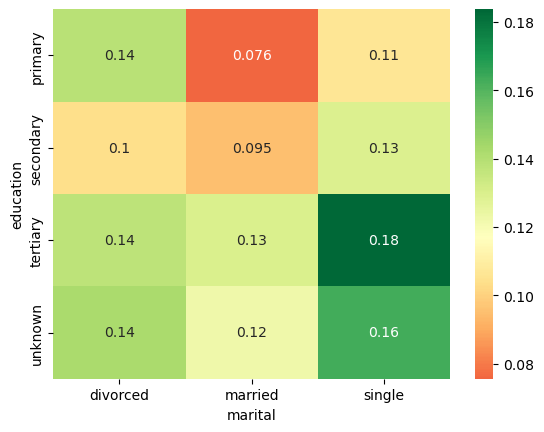

In [115]:
sns.heatmap(res,annot=True,cmap="RdYlGn",center=0.117)

#### Job vs marital vs response 

In [116]:
#create the heat map of Job vs marital vs response_flag.
res_1=pd.pivot_table(data=inp1,index='job',columns='marital',values='response_flag',aggfunc=np.mean)

<AxesSubplot:xlabel='marital', ylabel='job'>

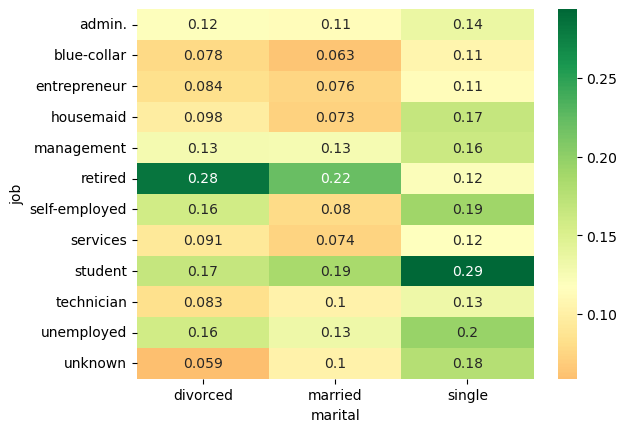

In [117]:
sns.heatmap(res_1,annot=True,cmap="RdYlGn",center=0.117)

#### Education vs poutcome vs response

In [119]:
#create the heat map of education vs poutcome vs response_flag.
res_2=pd.pivot_table(data=inp1,index="education",columns="poutcome",values="response_flag")

In [120]:
res_2

poutcome,failure,other,success,unknown
education,,,,
primary,0.088785,0.143443,0.609023,0.071821
secondary,0.109007,0.140831,0.641902,0.084244
tertiary,0.168683,0.220994,0.657005,0.114256
unknown,0.158192,0.200000,0.679012,0.101761


<AxesSubplot:xlabel='poutcome', ylabel='education'>

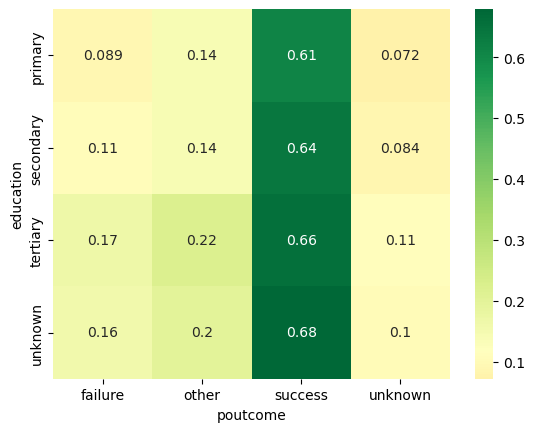

In [122]:
sns.heatmap(res_2,annot=True,cmap="RdYlGn",center=0.117)